In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
train_data = pd.read_csv('../data/train_processed.csv', index_col=0)
test_data = pd.read_csv('../data/test_processed.csv', index_col=0)

In [5]:
train_data.head(10)

,SiteId,ForecastId,Value,wday,mday,yday,month,year,time,wday_sin,...,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature,Distance
Timestamp,,,,,,,,,,,,,,,,,,,,,
2009-06-23 06:45:00,297,6603,96408.826731,1,23,174,6,2009,6.75,0.866025,...,-0.989314,1.224647e-16,-1.0,0.980785,-0.195090,0.0,18.0,19608.574928,14.0,1.707966
2009-06-23 07:45:00,297,6603,76800.251802,1,23,174,6,2009,7.75,0.866025,...,-0.989314,1.224647e-16,-1.0,0.896873,-0.442289,0.0,18.0,19608.574928,15.0,1.707966
2009-06-23 08:45:00,297,6603,75166.203892,1,23,174,6,2009,8.75,0.866025,...,-0.989314,1.224647e-16,-1.0,0.751840,-0.659346,0.0,18.0,19608.574928,16.0,1.707966
2009-06-23 09:45:00,297,6603,71898.108070,1,23,174,6,2009,9.75,0.866025,...,-0.989314,1.224647e-16,-1.0,0.555570,-0.831470,0.0,18.0,19608.574928,18.0,1.707966
2009-06-23 10:45:00,297,6603,73532.155981,1,23,174,6,2009,10.75,0.866025,...,-0.989314,1.224647e-16,-1.0,0.321439,-0.946930,0.0,18.0,19608.574928,21.0,1.707966
2009-06-23 11:45:00,297,6603,71898.108070,1,23,174,6,2009,11.75,0.866025,...,-0.989314,1.224647e-16,-1.0,0.065403,-0.997859,0.0,18.0,19608.574928,22.0,1.707966
2009-06-23 12:45:00,297,6603,71898.108070,1,23,174,6,2009,12.75,0.866025,...,-0.989314,1.224647e-16,-1.0,-0.195090,-0.980785,0.0,18.0,19608.574928,23.0,1.707966
2009-06-23 13:45:00,297,6603,70264.060160,1,23,174,6,2009,13.75,0.866025,...,-0.989314,1.224647e-16,-1.0,-0.442289,-0.896873,0.0,18.0,19608.574928,24.0,1.707966
2009-06-23 14:45:00,297,6603,71898.108070,1,23,174,6,2009,14.75,0.866025,...,-0.989314,1.224647e-16,-1.0,-0.659346,-0.751840,0.0,18.0,19608.574928,25.0,1.707966


In [23]:
test_data.head(10)

,SiteId,ForecastId,Value,wday,mday,yday,month,year,time,wday_sin,...,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature,Distance
Timestamp,,,,,,,,,,,,,,,,,,,,,
2009-08-02 10:45:00,297,6603,86278.056494,6,2,214,8,2009,10.75,-2.449294e-16,...,-0.856551,-0.866025,-0.5,0.321439,-0.946930,1.0,18.0,19608.574928,28.0,1.707966
2009-08-02 11:45:00,297,6603,86278.056494,6,2,214,8,2009,11.75,-2.449294e-16,...,-0.856551,-0.866025,-0.5,0.065403,-0.997859,1.0,18.0,19608.574928,30.0,1.707966
2009-08-02 12:45:00,297,6603,86278.056494,6,2,214,8,2009,12.75,-2.449294e-16,...,-0.856551,-0.866025,-0.5,-0.195090,-0.980785,1.0,18.0,19608.574928,31.0,1.707966
2009-08-02 13:45:00,297,6603,86278.056494,6,2,214,8,2009,13.75,-2.449294e-16,...,-0.856551,-0.866025,-0.5,-0.442289,-0.896873,1.0,18.0,19608.574928,33.0,1.707966
2009-08-02 14:45:00,297,6603,86278.056494,6,2,214,8,2009,14.75,-2.449294e-16,...,-0.856551,-0.866025,-0.5,-0.659346,-0.751840,1.0,18.0,19608.574928,33.0,1.707966
2009-08-02 15:45:00,297,6603,86278.056494,6,2,214,8,2009,15.75,-2.449294e-16,...,-0.856551,-0.866025,-0.5,-0.831470,-0.555570,1.0,18.0,19608.574928,33.0,1.707966
2009-08-02 16:45:00,297,6603,86278.056494,6,2,214,8,2009,16.75,-2.449294e-16,...,-0.856551,-0.866025,-0.5,-0.946930,-0.321439,1.0,18.0,19608.574928,34.0,1.707966
2009-08-02 17:45:00,297,6603,86278.056494,6,2,214,8,2009,17.75,-2.449294e-16,...,-0.856551,-0.866025,-0.5,-0.997859,-0.065403,1.0,18.0,19608.574928,33.0,1.707966
2009-08-02 18:45:00,297,6603,86278.056494,6,2,214,8,2009,18.75,-2.449294e-16,...,-0.856551,-0.866025,-0.5,-0.980785,0.195090,1.0,18.0,19608.574928,32.0,1.707966


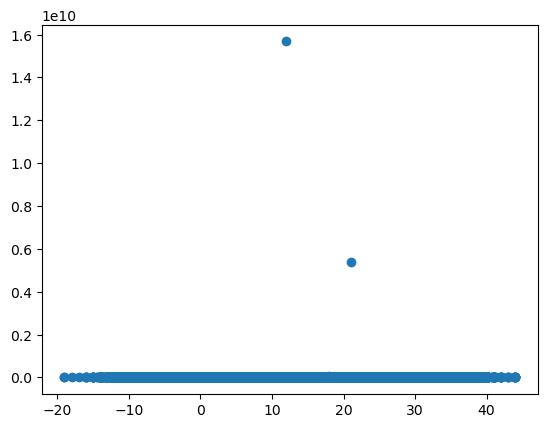

In [24]:
plt.scatter(train_data['Temperature'],train_data['Value'])
plt.show()

In [25]:
abnormal_data = train_data[train_data['Value'] >= 5 * 10e7]
abnormal_data.head(10)

,SiteId,ForecastId,Value,wday,mday,yday,month,year,time,wday_sin,...,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature,Distance
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-08-14 22:30:00,93,1964,1.748586e+11,4,14,226,8,2015,22.5,-0.866025,...,-0.732494,-0.866025,-0.500000,-0.382683,0.923880,0.0,18.0,12728.709349,NaN,NaN
2015-10-30 13:00:00,261,5536,1.169846e+10,4,30,303,10,2015,13.0,-0.866025,...,0.482508,-0.866025,0.500000,-0.258819,-0.965926,0.0,18.0,32647.617853,NaN,NaN
2016-02-02 00:00:00,213,4325,5.397313e+09,1,2,33,2,2016,0.0,0.866025,...,0.842942,0.866025,0.500000,0.000000,1.000000,0.0,18.0,12539.932864,21.0,17.009717
2016-02-26 22:30:00,93,1968,4.064907e+11,4,26,57,2,2016,22.5,-0.866025,...,0.556017,0.866025,0.500000,-0.382683,0.923880,0.0,18.0,12728.709349,NaN,NaN
2016-04-19 15:30:00,93,1969,6.404683e+11,1,19,110,4,2016,15.5,0.866025,...,-0.317191,0.866025,-0.500000,-0.793353,-0.608761,0.0,18.0,12728.709349,NaN,NaN
2016-04-19 16:30:00,93,1969,3.202342e+11,1,19,110,4,2016,16.5,0.866025,...,-0.317191,0.866025,-0.500000,-0.923880,-0.382683,0.0,18.0,12728.709349,NaN,NaN
2016-07-22 00:00:00,213,4325,1.567639e+10,4,22,204,7,2016,0.0,-0.866025,...,-0.932289,-0.500000,-0.866025,0.000000,1.000000,0.0,18.0,12539.932864,12.0,17.009717
2016-07-22 15:00:00,250,5276,8.428682e+08,4,22,204,7,2016,15.0,-0.866025,...,-0.932289,-0.500000,-0.866025,-0.707107,-0.707107,0.0,18.0,1448.455992,NaN,NaN
2016-07-22 16:00:00,250,5276,1.685734e+09,4,22,204,7,2016,16.0,-0.866025,...,-0.932289,-0.500000,-0.866025,-0.866025,-0.500000,0.0,18.0,1448.455992,NaN,NaN


In [26]:
train = train_data[train_data['Value'] < 5 * 10e7]

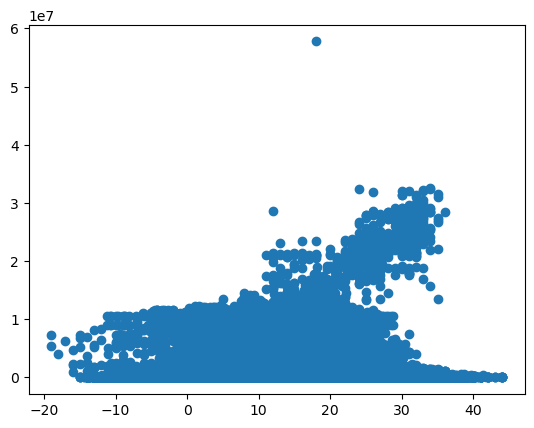

In [27]:
plt.scatter(train['Temperature'],train['Value'])
plt.show()

<Axes: xlabel='Surface', ylabel='Value'>

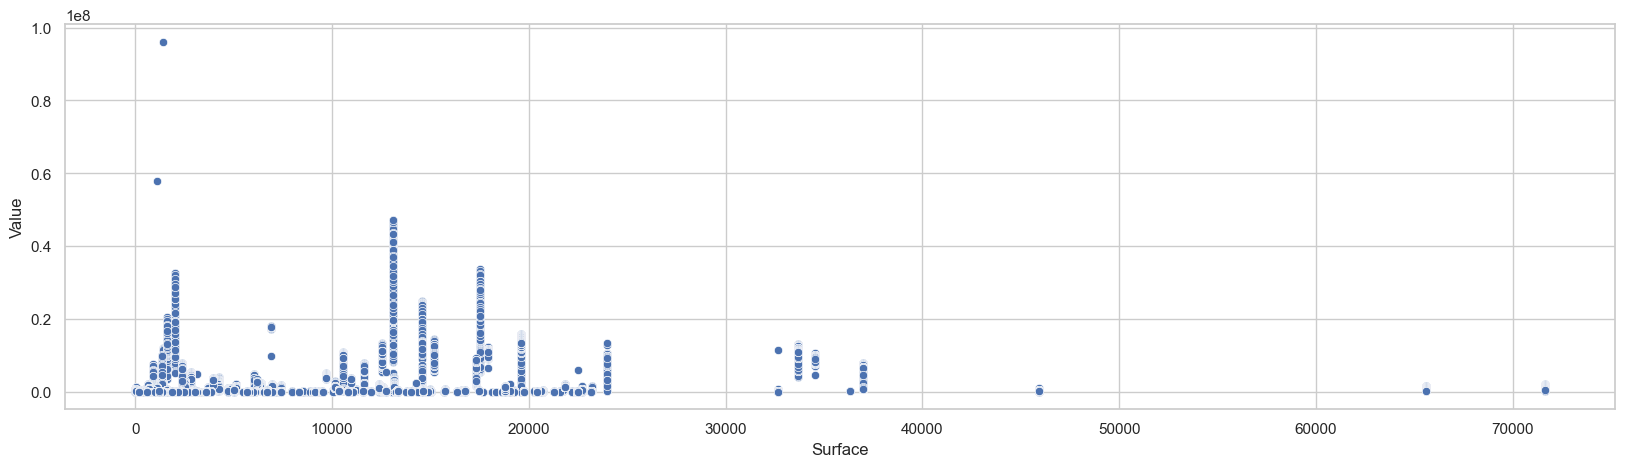

In [35]:
sns.set(style='whitegrid', rc={'figure.figsize':(20, 5)})
sns.scatterplot(x='Surface', y='Value', data=train)

In [ ]:
train.groupby(['SiteId'])

In [37]:
train.groupby(['SiteId', 'month'])['Value'].mean()

SiteId  month
1       1        4.502678e+06
        2        3.133051e+06
        3        3.731234e+06
        4        4.152123e+06
        5        6.685674e+06
                     ...     
304     9        1.824698e+05
        10       1.390941e+05
        11       1.216203e+05
        12       1.157416e+05
305     11       1.832920e+03
Name: Value, Length: 2831, dtype: float64

In [38]:
train.groupby(['SiteId', 'wday'])['Value'].mean()

SiteId  wday
1       0       4.603797e+06
        1       5.171426e+06
        2       5.108945e+06
        3       4.814922e+06
        4       4.153691e+06
                    ...     
305     2       1.907900e+03
        3       1.655048e+03
        4       2.037650e+03
        5       1.835587e+03
        6       1.094181e+03
Name: Value, Length: 1869, dtype: float64